# Gravitasjons-prosjekt i Programmering og Modellering

### _Av Johanne, Linnea, Ståle og Tilde_

### Problemstilling: 
Bruke og endre et datasett fra en nettside for å undersøke om det er mulig å finne gravitasjonskonstanten $\gamma$ kun ved hjelp av datasettet og formelen for gravitasjonsfeltstyrke $g=\gamma \frac{M}{r^2}$.

Dette er linken til tabellen vi hentet datasettet fra: [NASA planetary factsheet](https://nssdc.gsfc.nasa.gov/planetary/factsheet/)

### Introduksjon

Gravitasjonskonstanten blir blant annet brukt til å regne på gravitasjonskrefter som virker mellom to gjenstander. Konstanten er universell, og gjelder derfor både i verdensrommet mellom planter, såvel som mellom to gjenstander på jorda. 

I dette prosjektet skal vi sjekke om vi finner denne konstanten dersom vi bruker verdier hentet fra NASAs datasett om solsystemets planeter, og formelen vi har lært i fysikk 2 for gravitasjonsfeltstyrke, $g=\gamma \frac{M}{r^2}$
* Her er g gravitasjonsfeltstyrken i m/s^2, M massen til sentrallegemet (altså objektet som omgir seg med gravitasjonsfeltet) i kg og r radien til sentrallegemet. 

Gravitasjonskonstanten $\gamma$ er gitt som $6.67 * 10^{-11} $. Det er denne verdien vi skal se om vi finner frem til, ved å bruke NASAs datasett og formelen. Vi skal så analysere og sammenlikne verdiene vi får for å sjekke om problemstillingen stemmer. 

### Metode

##### Hovedtrekk

* Først hentet vi ut dataene fra linken, og gjorde om html-koden til string
* Så laget vi lister med de aktuelle verdiene, og organiserte verdiene i en tabell
* Deretter omformulerte vi formelen, så vi kunne bruke dataene for planetene til å finne $\gamma$

##### Detaljert

Det første vi gjorde var å hente inn data fra nettsiden. 

In [2]:
#Importerer pakkene vi trenger
from urllib import request

In [6]:
#Henter inn all informasjon fra nettsiden, og lagrer html-koden som string
planet_side = request.urlopen("https://nssdc.gsfc.nasa.gov/planetary/factsheet/")
type(planet_side)
print(planet_side.code)  #denne koden sjekker om all dataen er importert uten feil og en output på 200 betyr at alt er importert feilfritt
#print(planet_side.peek())  #Denne skriver ut selve koden til nettsiden som vi senere bruker for å se hvor vi skal "kutte" dataen
planet_data = planet_side.read()
print(type(planet_data))
print(len(planet_data))
planeter = planet_data.decode("UTF-8")
print(type(planeter))

200
<class 'bytes'>
14368
<class 'str'>


Her får vi "str" som output. Dettte bekrefter at programmet nå har gjort om all html-koden fra nettsiden til en string i python.

Det neste vi skulle gjøre, var å hente inn dataene. Dette gjorde vi ved å bruke request, og dele opp stringen av html-kode så verdiene i tabellen blir plassert i lister. 

In [26]:
#Masse
n=0
liste_masse=[]
while True:
    n+=1
    masse=planeter.split("#mass")[1].split("tr>")[0].split("</td>")[n].split(">")[1]
    liste_masse.append(masse)
    if n>=10:
        break
        
#Diameter
n=0
liste_diam=[]
while True:
    n+=1
    diam=planeter.split("#diam")[1].split("tr>")[0].split("</td>")[n].split(">")[1]
    liste_diam.append(diam)
    if n>=10:
        break        


#Tyngde
n=0
liste_tyngde=[]
while True:
    n+=1
    tyngde=planeter.split("#grav")[1].split("tr>")[0].split("</td>")[n].split(">")[1]
    liste_tyngde.append(tyngde)
    if n>=10:
        break      


På nettsiden vi henter verdiene fra, har de brukt komma som tusenseparatorer for diameter. Python ville derfor ikke gjøre om dette til float, som vi trenger for å jobbe videre med tallene. Vi fjerner kommaene. 

In [30]:
liste_diam = [i.replace(",","") for i in liste_diam] 

Nå har vi hentet ut verdiene vi trenger fra nettsiden. 
Vi setter opp verdiene i en tabell, for at de skal være mer oversiktlige.

In [31]:
#Bruker pandas for å lage tabell, så vi importerer pakken
import pandas as pd

lister_planeter=[liste_masse, liste_diam, liste_tyngde]
fytab=pd.DataFrame(lister_planeter,
                columns=['Merkur', 'Venus', 'Jorda', 'Månen', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptun', 'Pluto'], 
                index=['Masse', 'Diameter', 'Tyngde'])
fytab

,Merkur,Venus,Jorda,Månen,Mars,Jupiter,Saturn,Uranus,Neptun,Pluto
Masse,0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0146
Diameter,4879,12104,12756,3475,6792,142984,120536,51118,49528,2370
Tyngde,3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7


Vi printer tabellen for å kontrollere dataene med nettsiden. De stemmer. 

Vi ser at det er noen av kolonnene vi ikke trenger. Vi kommer bare til å se på planetene, så derfor fjerner vi kolonnene for månen og Pluto

In [32]:
fytab.pop('Månen')
fytab.pop('Pluto')

Masse       0.0146
Diameter      2370
Tyngde         0.7
Name: Pluto, dtype: object

På nettsiden var ikke alle verdiene oppgitt i SI-enheter. For å regne med de gjør vi de derfor om til riktig enheter. Vi gjør samtidig listene om til floats, og diameter om til radius. 

In [33]:
fytab.loc['Masse'] = fytab.loc['Masse'].astype(float)
fytab.loc['Masse'] *= float(10**24)

fytab.loc['Diameter'] = fytab.loc['Diameter'].astype(float)
fytab.loc['Diameter'] *= float((10**3)/2)

fytab.loc['Tyngde'] = fytab.loc['Tyngde'].astype(float)

Vi gjør så den siste delen av jobben med å fremstille tabellen, ved å endre navnene så de oppgir enheten, og printer for å kontrollere. 

In [35]:
fytab = fytab.rename({'Diameter': 'Radius (m)', 'Masse':'Masse (kg)', 'Tyngde':'Tyngde (m/s**2)'})

fytab

,Merkur,Venus,Jorda,Mars,Jupiter,Saturn,Uranus,Neptun
Masse (kg),3.3e+23,4.87e+24,5.97e+24,6.42e+23,1.898e+27,5.68e+26,8.68e+25,1.02e+26
Radius (m),2.4395e+06,6.052e+06,6.378e+06,3.396e+06,7.1492e+07,6.0268e+07,2.5559e+07,2.4764e+07
Tyngde (m/s**2),3.7,8.9,9.8,3.7,23.1,9,8.7,11


Så begynner vi på analyse-delen, hvor vi bruker formelen $g=\gamma \frac{M}{r^2}$

Vi omformer formelen med hensyn på gamma til $\gamma=\frac{gr^2}{M}$, og regner ut gravitasjonskonstanten basert på verdiene oppgitt i tabellen på nettsiden

In [36]:
#Lager liste for gravitasjonskonstantene vi regner ut, altså gammaverdiene, til planetene
gamma_verdier = []

n=0
while True:
    r = fytab.iat[1, n]   #Henter verdier fra tabellene
    M = fytab.iat[0, n]
    g = fytab.iat[2, n]
    gamma = (g*(r**2))/(M)
    gamma_verdier.append(gamma)
    n+=1
    if n >= 8:
        break
        
print(gamma_verdier)

[6.672513007575757e-11, 6.693586562628337e-11, 6.67760574874372e-11, 6.646638504672896e-11, 6.220576927207588e-11, 5.755296904225352e-11, 6.547676940898617e-11, 6.613541819607844e-11]


Resten av programmet går ut på å analysere dataene vi har hentet, så vi skriver dette under "Resultater og analyse". 

### Resultater og analyse

Vi ser at verdiene vi får for gamma, som skal være konstant, ikke er konstante.
Vi lager et søylediagram over gravitasjons"-ikke-helt-"konstantene, for å sammenlikne verdiene vi fikk. 

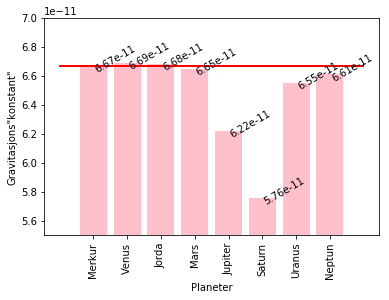

In [41]:
#Her trenger vi math-pakken og pyplot for å lage søylediagrammet
import math
import matplotlib.pyplot as plt

#Vi vil vise verdiene i diagrammet, og må derfor avrunde de
gamma_verdier_kort = [ '%.13f' % elem for elem in gamma_verdier]
gamma_verdier_kort = [float(i) for i in gamma_verdier_kort]

x = ['Merkur', 'Venus', 'Jorda',  'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptun']
y = gamma_verdier_kort

fig, graf = plt.subplots(1)
graf.bar(x, y, width = 0.8, color='pink')
ymin, ymax = (5.5*10**-11), (7*10**-11) #For at søylene skal være synlige må vi sette max og min verdi
graf.set_ylim(ymin, ymax)
plt.xlabel('Planeter')
plt.ylabel('Gravitasjons"konstant"')
plt.xticks(rotation=90)

#Viser gamma-verdiene i diagrammet
for i, j in zip(x, y):
    graf.annotate(str(j), xy=(i, j+(0.1*10**-11)), rotation=30)

#Lager en linje for det gravitasjonskonstanten skal være, for å sammenlikne
graf.hlines(y=(6.67*10**-11), xmin=-1, xmax=8,linewidth=2, color='r')
plt.show()

Av diagrammet ser vi at vi får $6.67*10^{-11}$ som $\gamma$ for Merkur, som stemmer den faktiske verdien til $\gamma$-konstanten. 
For de andre planetene har vi følgende avvik:

| Planet     |  Avvik  |
|---|---|
|Merkur | 0.00 % | 
|Venus|0.30 %|
|Jorda | 0.15 % |
|Mars | 0.45 % |
|Jupiter|6.70 %|
|Saturn|13.6 %|
|Uranus|1.80 %|
|Neptun|0.90 % |

Vi har altså avvik fra den egentlige konstanten gamma på 0 - 13.6 %

Vi ser her at de største avvikene er for Jupiter og Saturn. 
Når vi sammenlikner verdiene oppgitt for tyngdeakselerasjonen for Jupiter og Saturn på nettsiden vi importerte dataene fra, med det som er oppgitt i fysikktabellene våre fra skolen, ser vi at det er betydelig avvik her. 

Jupiter og Saturn oppgis på nettsiden med tyngdeakselerasjon på henholdsvis  $23.1 \frac{m}{s^2}$ og $9 \frac{m}{s^2}$, og i fysikktabellen med $25 \frac{m}{s^2}$ og $10 \frac{m}{s^2}$.
Vi erstatter verdiene for tyngdeakselerasjon fra nettsiden med de fra fysikktabellen, for å se om avviket blir mindre. 

In [43]:
#Her erstatter vi gamma-verdien for Jupiter og Saturn i den forkortede listen
for n, i in enumerate(gamma_verdier_kort):
    if i == 6.22e-11: #Erstatter for Jupiter
        r = fytab.iat[1, 4]
        M = fytab.iat[0, 4]
        g = float(25)
        gamma = (g*(r**2))/(M)
        gamma = '%.13f' % gamma
        gamma_verdier_kort[n] = float(gamma)
    elif i == 5.76e-11: #Erstatter for Saturn
        r = fytab.iat[1, 5]
        M = fytab.iat[0, 5]
        g = float(10)
        gamma = (g*(r**2))/(M)
        gamma = '%.13f' % gamma
        gamma_verdier_kort[n] = float(gamma)

print(gamma_verdier_kort)

[6.67e-11, 6.69e-11, 6.68e-11, 6.65e-11, 6.73e-11, 6.39e-11, 6.55e-11, 6.61e-11]


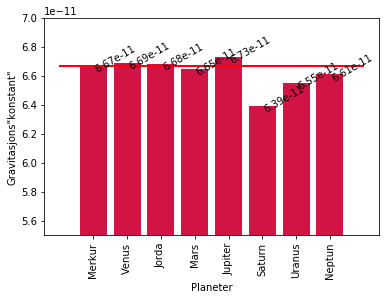

In [57]:
#Her printer vi den nye kurven, for å sammenlikne
fig, graf = plt.subplots(1)
graf.bar(x, y, width = 0.8, color='#d21445')
ymin, ymax = (5.5*10**-11), (7*10**-11)
graf.set_ylim(ymin, ymax)
plt.xlabel('Planeter')
plt.ylabel('Gravitasjons"konstant"')
plt.xticks(rotation=90)
graf.hlines(y=(6.67*10**-11), xmin=-1, xmax=8,linewidth=2, color='r')

for i, j in zip(x, y):
    graf.annotate(str(j), xy=(i, j+(0.1*10**-11)), rotation=30)
    
plt.show()

Vi ser at avviket nå er mye mindre. 
Setter høyere minimumsverdi, så vi kan se nærmere på diagrammet. 

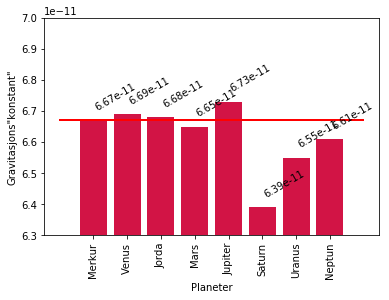

In [58]:
fig, graf = plt.subplots(1)
graf.bar(x, y, width = 0.8, color='#d21445')
ymin, ymax = (6.3*10**-11), (6.8*10**-11)
graf.set_ylim(ymin, ymax)
plt.xlabel('Planeter')
plt.ylabel('Gravitasjons"konstant"')
plt.xticks(rotation=90)
graf.hlines(y=(6.67*10**-11), xmin=-1, xmax=8,linewidth=2, color='r')

for i, j in zip(x, y):
    graf.annotate(str(j), xy=(i, j+(0.1*10**-11)), rotation=30)
    
plt.show()

### Diskusjon

Av resultatene og analysen ser vi at de tilnærmede verdiene av $\gamma$ ikke stemmer overens med verdien vi i teorien skulle få. Eventuelle feillkilder kan være at dataene til NASA er grovt avrundet. Når vi bruker så små verdier som $6.67*10^{-11}$, vil slike avrundinger påvirke resultatene. 

I tillegg sammenliknet vi verdiene i datsasettet vårt med verdier som oppgis i heftet _Gyldendals tabeller og formler i fysikk: Fysikk 1 og Fysikk 2_ (2011). Vi oppdaget da at disse verdiene ikke er like, som kom frem tidligere i oppgaven. For eksempel oppgis det at tyngdeakselerasjonen på Saturn er $10 \frac{m}{s^2}$ i heftet, mens NASA oppgir at den er lik $9 \frac{m}{s^2}$. Med gyldendals verdi blir konstanten vi regner ut $\gamma = 6.4*10^{-11}$, som gir et avvik på 4 %, sammenliknet med et avvik på 13.6% dersom vi bruker NASAs verdier. 

Dette kan tyde på at de verdiene vi har hentet ikke er nøyaktige nok, og kan derfor ikke brukes til å bestemmme konstanten. 

En annen feilkilde kan være at nettsiden oppgir *gjennomsnittet* av planetenes diameter og tyngdeakselerasjon. Særlig for gassplanetene vil dette være en betydelig feilkilde, ettersom diameteren oppgis med måleusikkerhet (se kilden nederst i oppgaven). Tyngdeakselerasjonen er også gjennomsnittlig noe som kan være grunnen til at verdiene vi får er ulike. Med fysiske prinsipper i bakhodet er det naturlig at det er gjennomsnittet som oppgis fordi for gassplaneter, som Saturn og Jupiter, vil tyngdeakselerasjonen variere ettersom radien varierer. Planetene er altså ikke perfekte kuler!

I tillegg er tyngdeakselerasjonen (gravitasjonsfeltstyrken) avhengig av masse, størrelse og _massetettheten_, men formelen vi bruker inneholder kun variablene masse og radius. Det tas dermed ikke hensyn til massetettheten, noe som kan påvirke ha resultatene. Formelen er ikke nødvendigvis den beste modellen for å finne gravitasjonskonstanten fordi massetettheten neglisjeres. 

Konlusjonen på problemstillingen er altså at vi _ikke_ bare kan bruke datasettet fra NASA og formelen $g=\gamma \frac{M}{r^2}$ for å finne gravitasjonskonstanten, fordi resultatene viser at det finnes for mange feilkilder og unøyaktigheter i utregningen, noe som får konsekvenser når vi ser på så små verdier. 

### Kilder

Williams, Matt. _How strong is gravity on other planets?_ (01.01.16). Hentet fra [https://phys.org/news/2016-01-strong-gravity-planets.html]

Aamot, Eimund og Haugan, John. _Gyldendals tabeller og formler i fysikk, Fysikk 1 og Fysikk 2_. (2011). Gyldendal, Oslo. 

Callin, Pålsgård, Stadsnes og Tellefsen. _Ergo Fysikk 2 Grunnbok_. (2008). H. Aschehough & Co, Oslo. 